### Introduction  

This project explores the application of machine learning techniques to predict whether an individual earns more than \$50K per year based on demographic and employment-related attributes. The dataset used is the **Adult Income Dataset**, also known as the "Census Income Dataset." It contains various features such as age, workclass, education level, marital status, and more, offering a comprehensive view of factors that may influence income levels.  

The primary goal is to preprocess the data to ensure quality and consistency, then apply and compare the performance of six machine learning models: **Logistic Regression**, **Support Vector Machines (SVM)**, **Decision Tree**,**Bernoulli Naive Bayes classifier**, **K-Nearest Neighbors (KNN) classifie** and **Random Forest Classifier**. Model evaluation will include metrics such as accuracy, precision, recall, and F1-score to determine the most effective approach.

# Pre Processing

In [ ]:
!pip install scikit-learn

In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Load the Adult dataset from OpenML
adult_dataset = fetch_openml(data_id=1590, as_frame=True)
df = adult_dataset.frame

# Inspect the first few rows
print("First five rows of the dataset:")
print(df.head())

# Check the structure of the dataset
print("\nDataset Info:")
print(df.info())

# Separate features (X) and target (y)
target_column = 'class'
X = df.drop(columns=[target_column])
y = df[target_column]

# Display the shapes of X and y
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Preview the first few rows of features (X) and target (y)
print("\nFirst few rows of features (X):")
print(X.head())
print("\nFirst few rows of target (y):")
print(y.head())


First five rows of the dataset:
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week 

# Handling Missing Values

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

#Display the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage[missing_percentage > 0])


Missing Values in Each Column:
workclass         2799
occupation        2809
native-country     857
dtype: int64

Percentage of Missing Values:
workclass         5.730724
occupation        5.751198
native-country    1.754637
dtype: float64


In [ ]:
!pip install missingno

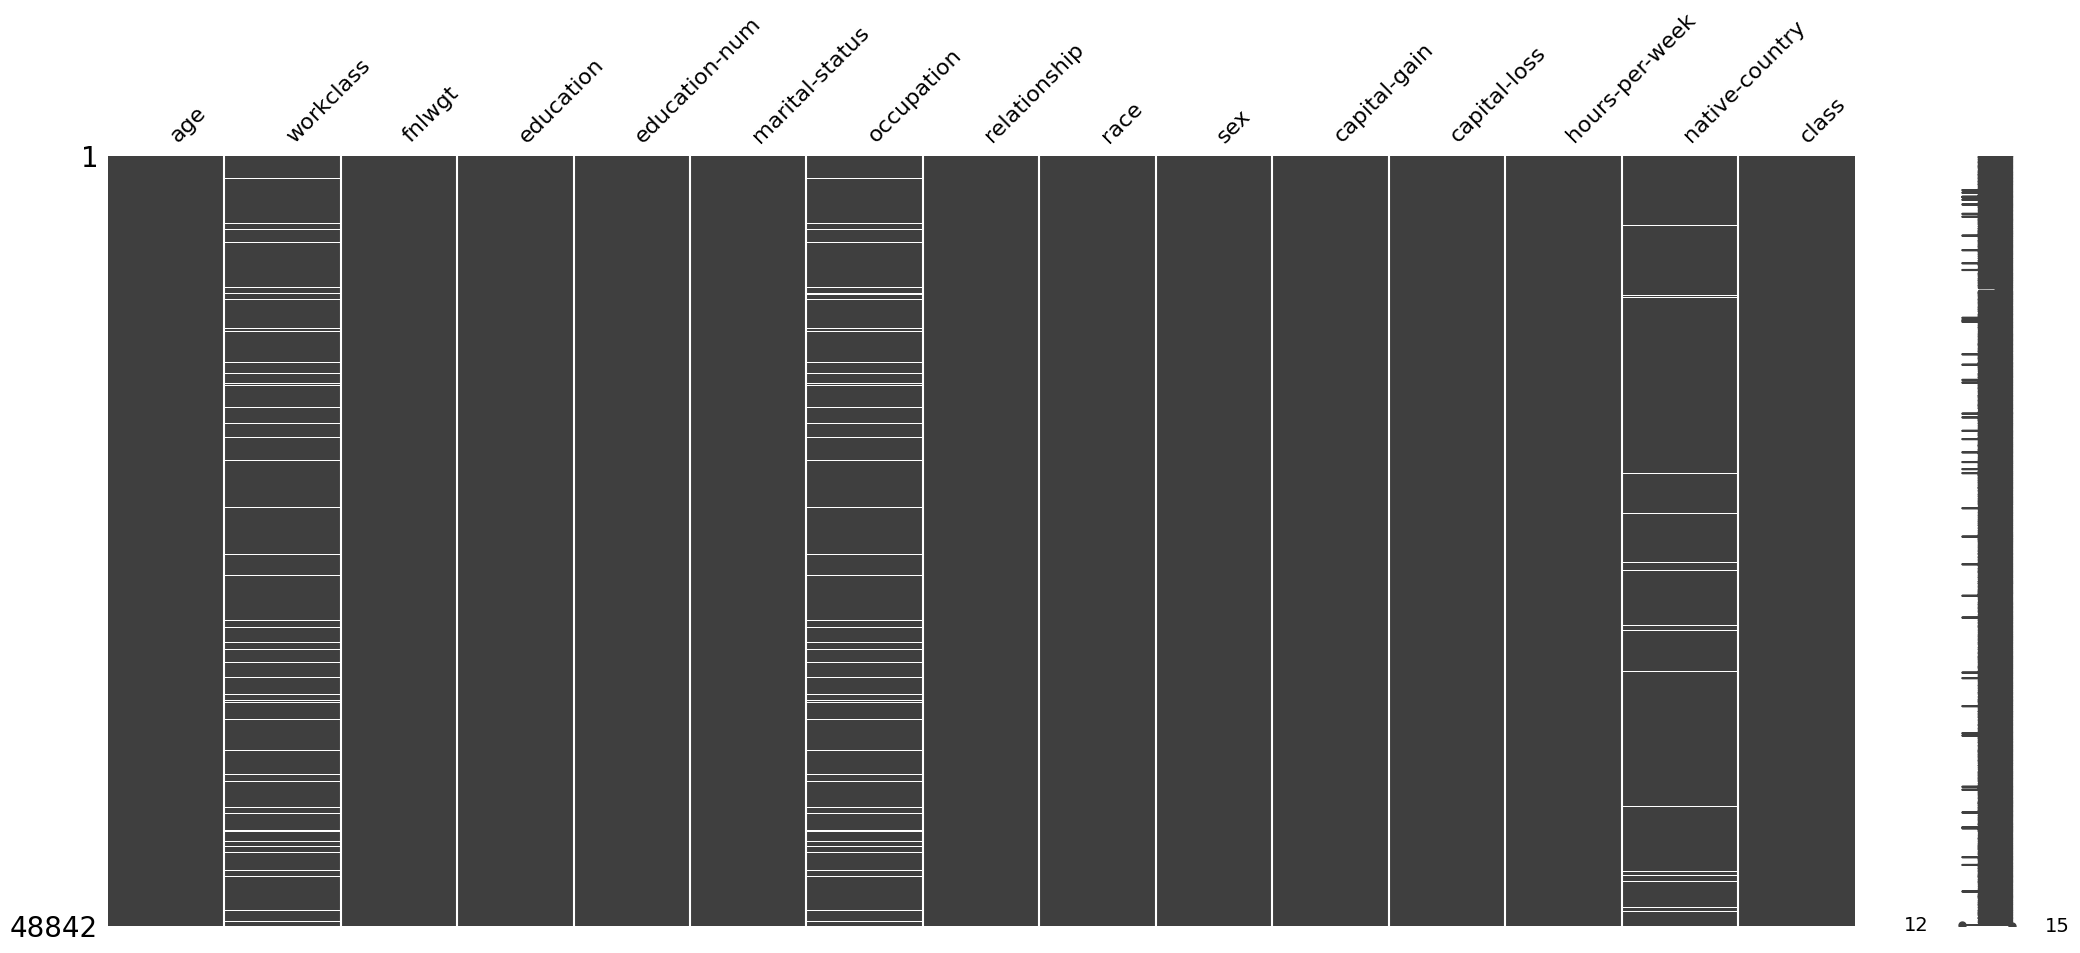

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data using missingno matrix
msno.matrix(df)
plt.show()

<Axes: >

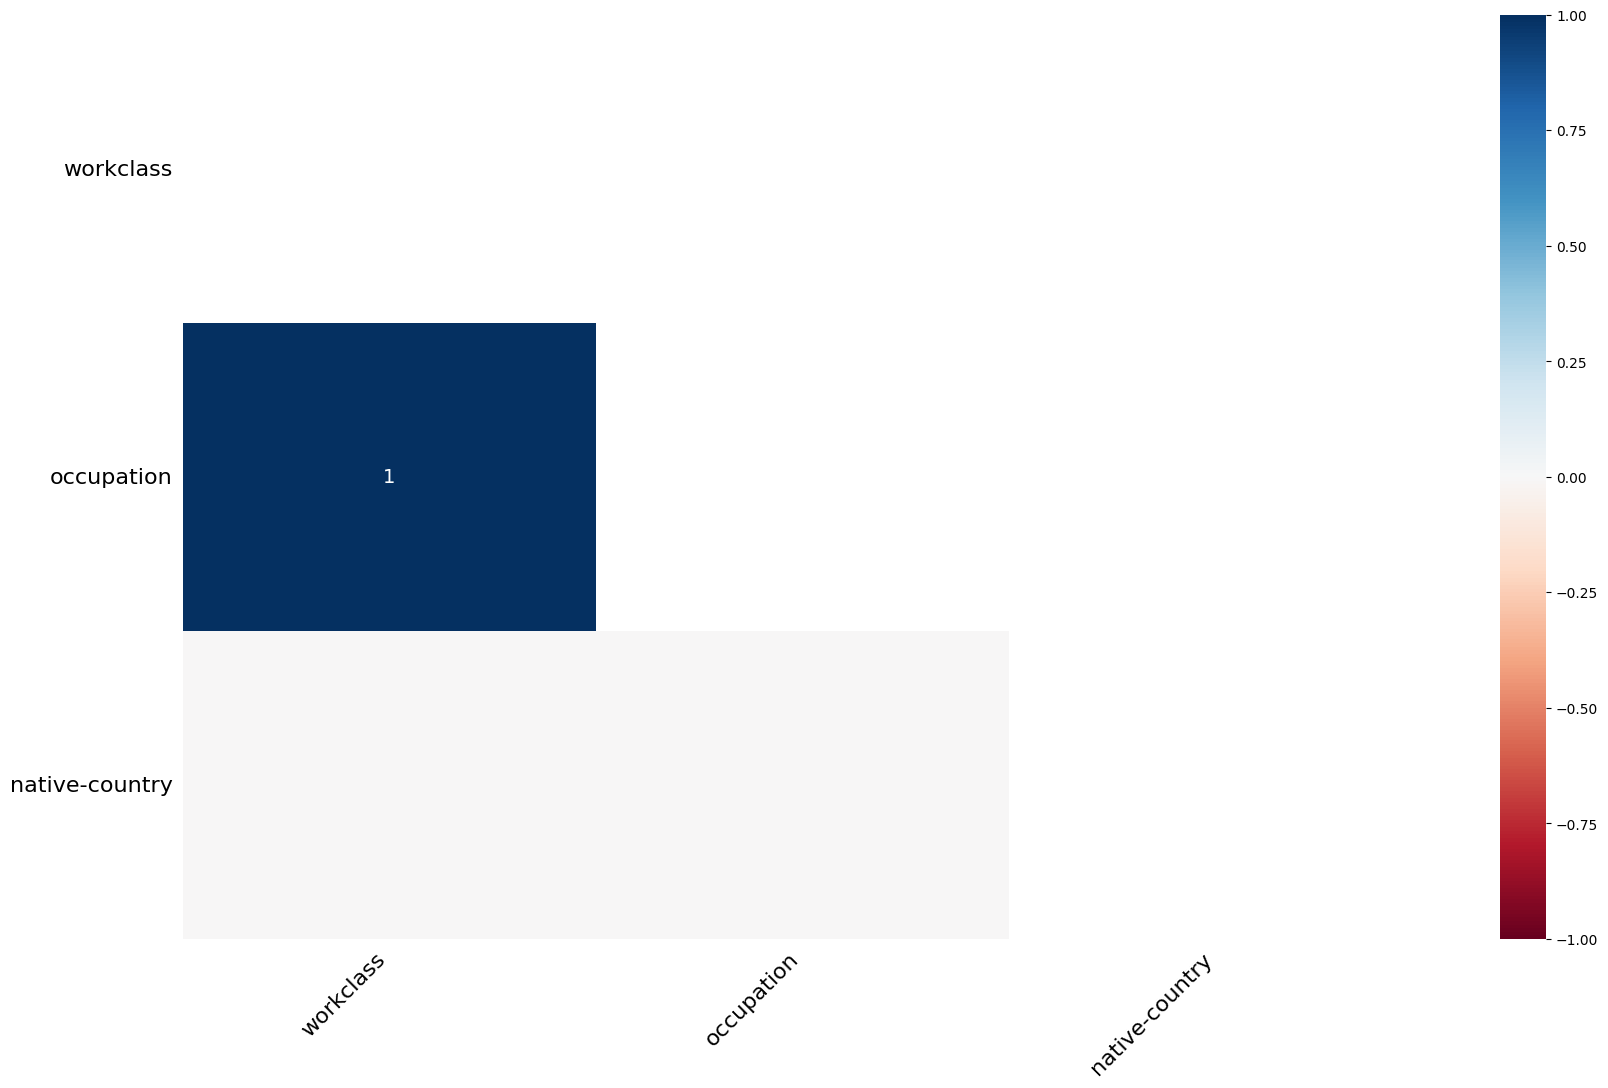

In [ ]:
msno.heatmap(X)

The dark blue color in the heatmap indicates a high negative correlation (close to -1) between the missingness of workclass and occupation. This means that rows with missing values in workclass tend to also have missing values in occupation, or vice versa

In [ ]:
# Impute missing values using the mode for 'workclass', 'occupation', and 'native-country'
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

# Check if missing values are handled
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


# Handling Duplicates

Checking for duplicate rows

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count the number of duplicate rows
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Preview the duplicate rows (if any)
if duplicate_count > 0:
    print("\nDuplicate rows:")
    print(df[duplicates].head(53))
else:
    print("\nNo duplicate rows found.")


Number of duplicate rows: 53

Duplicate rows:
       age         workclass  fnlwgt     education  education-num  \
864     24           Private  194630     Bachelors             13   
11189   37           Private   52870     Bachelors             13   
11212   29           Private   36440     Bachelors             13   
13848   30           Private  180317     Assoc-voc             11   
15960   18      Self-emp-inc  378036          12th              8   
18476   39           Private  184659       HS-grad              9   
19399   19           Private  130431       5th-6th              3   
19726   41           Private  116391     Bachelors             13   
20606   25           Private  308144     Bachelors             13   
21162   25           Private  308144     Bachelors             13   
21385   90           Private   52386  Some-college             10   
24361   21           Private  243368     Preschool              1   
25189   29           Private   41281     Bachelors       

 When we look at the duplicated ones, we see that there are no duplicates.

In [ ]:
# Remove duplicate rows
#df = df.drop_duplicates()

# Verify if duplicates are removed
#print("\nMissing values after removing duplicates:")
#print(df.isnull().sum())


# Handling Outliers

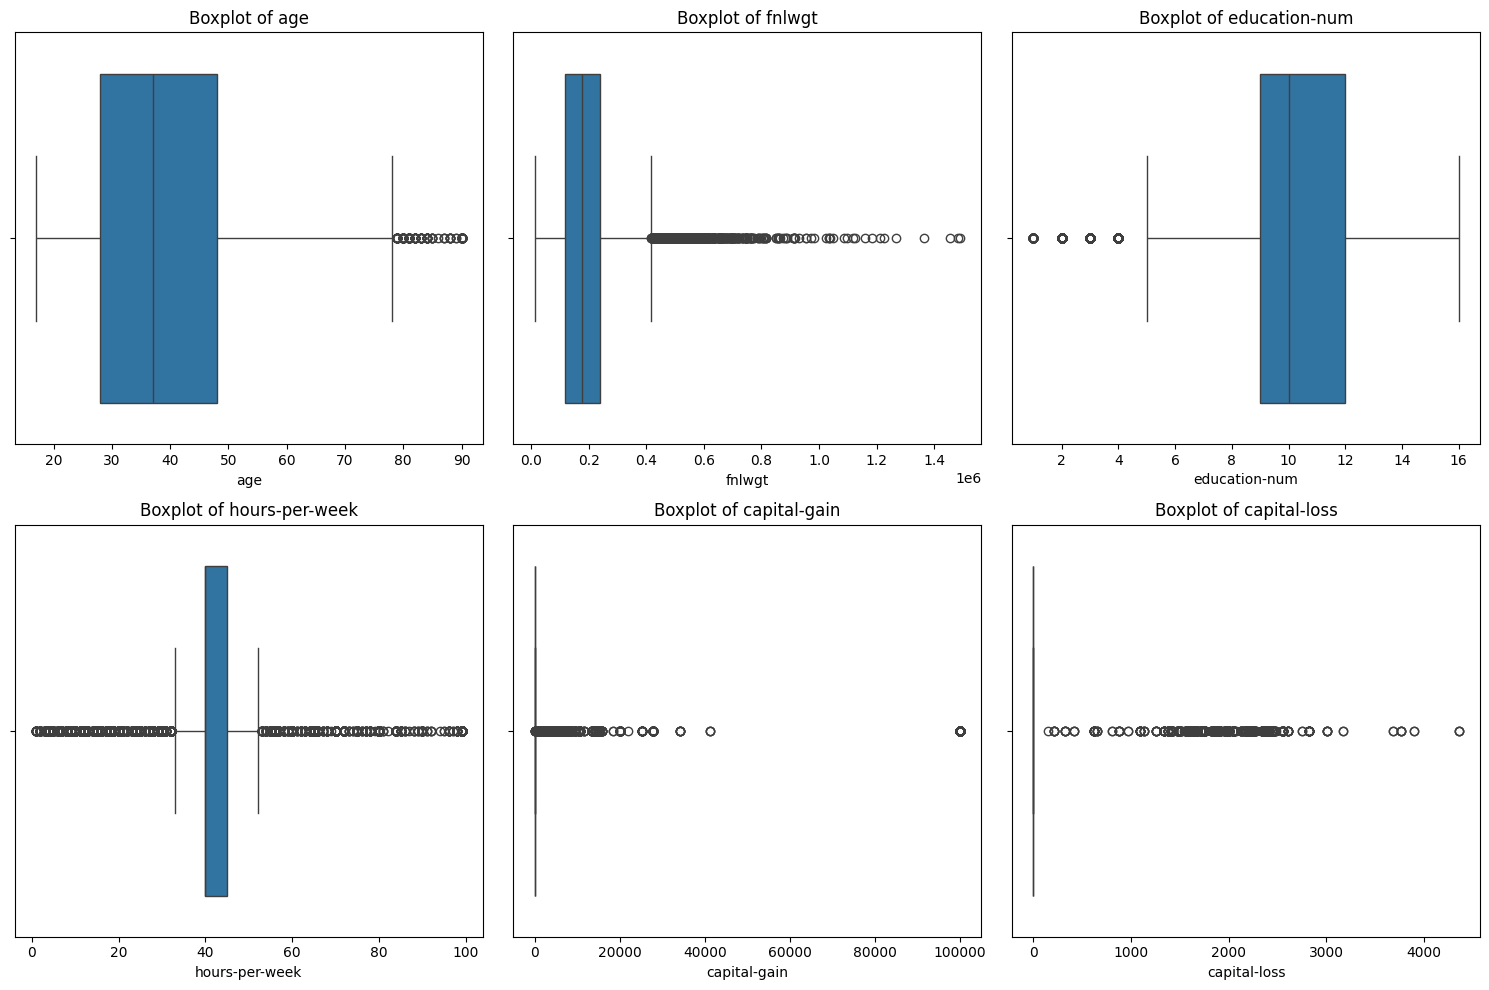

In [ ]:
# List of numerical columns to check for outliers
numerical_columns = ['age', 'fnlwgt', 'education-num','hours-per-week','capital-gain', 'capital-loss']

# Plot boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

# Load the Adult dataset from OpenML
adult_dataset = fetch_openml(data_id=1590, as_frame=True)
df = adult_dataset.frame

# Function to handle outliers by capping them at the lower and upper limits using IQR
def handle_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Convert the column to float64 to avoid dtype issues
    data[feature] = data[feature].astype('float64')

    # Replace outliers by capping them at the bounds
    data.loc[data[feature] < lower_bound, feature] = lower_bound
    data.loc[data[feature] > upper_bound, feature] = upper_bound

    return data, lower_bound, upper_bound

# List of columns to process for outliers
columns_to_process = ['age', 'fnlwgt', 'education-num','hours-per-week','capital-gain', 'capital-loss']

# Apply the function to handle outliers in each column
for col in columns_to_process:
    df, lower, upper = handle_outliers_iqr(df, col)
    print(f"{col}: Lower Bound = {lower}, Upper Bound = {upper}")


age: Lower Bound = -2.0, Upper Bound = 78.0
fnlwgt: Lower Bound = -62586.75, Upper Bound = 417779.25
education-num: Lower Bound = 4.5, Upper Bound = 16.5
hours-per-week: Lower Bound = 32.5, Upper Bound = 52.5
capital-gain: Lower Bound = 0.0, Upper Bound = 0.0
capital-loss: Lower Bound = 0.0, Upper Bound = 0.0


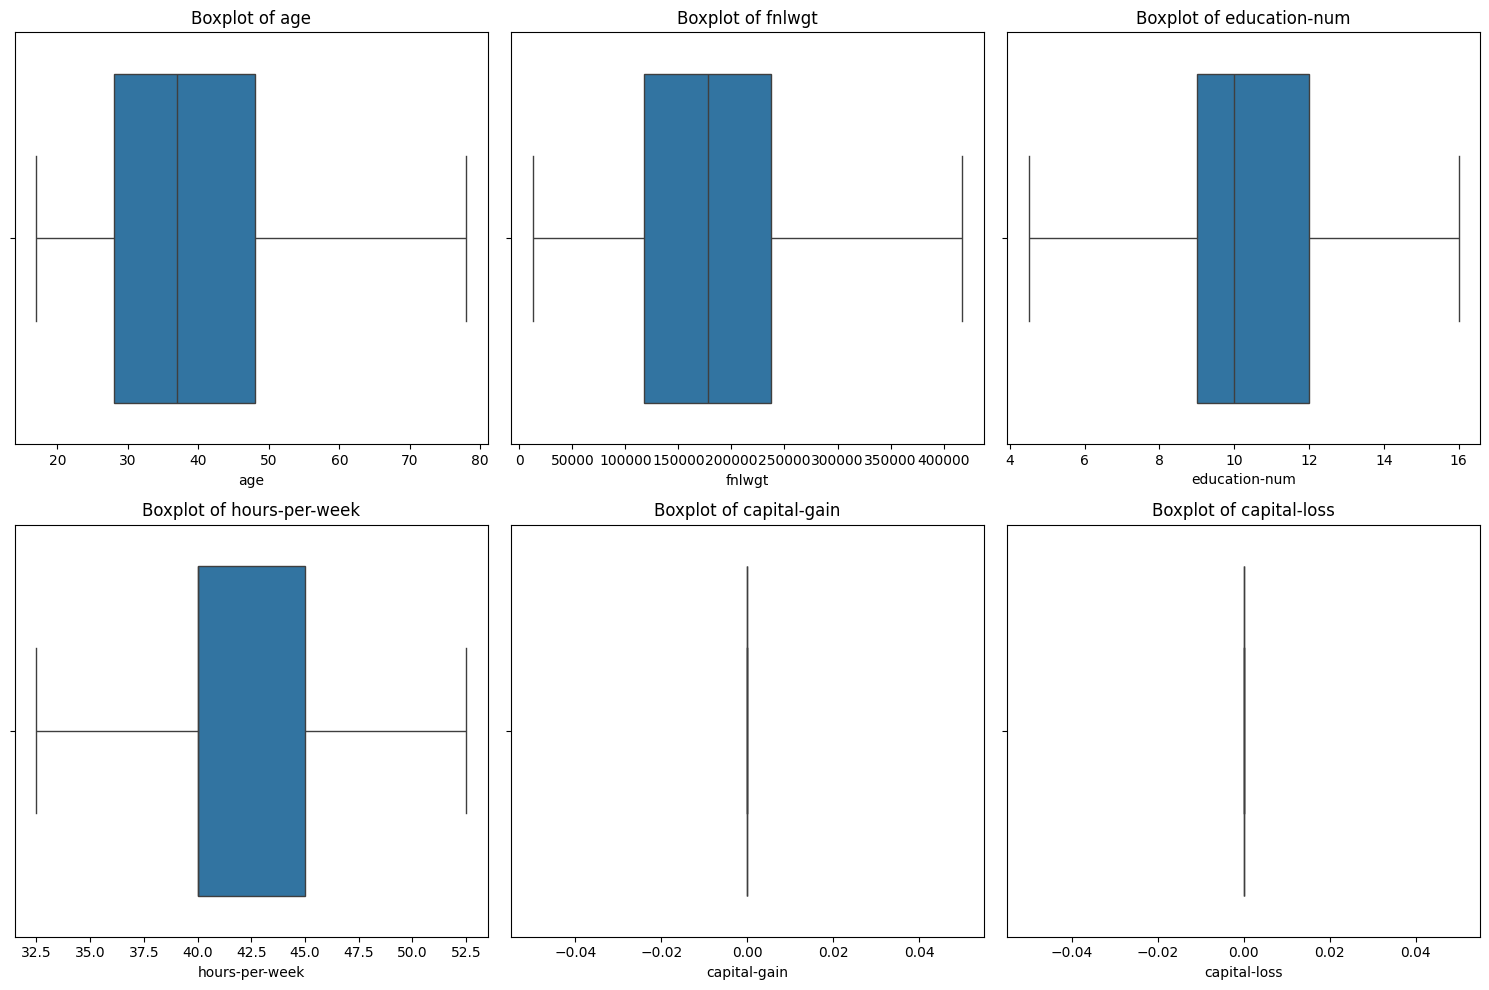

In [ ]:
# Box plots after handling outliers
numerical_columns = ['age', 'fnlwgt', 'education-num', 'hours-per-week','capital-gain', 'capital-loss']

# Plot boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Data Transformations

fnlwgt doesn't directly describe any characteristic of the individual, such as income, education, or occupation. It's more of an adjustment factor.

In [ ]:
df.drop(['fnlwgt'], axis = 1, inplace = True)

# Data Coding

In [ ]:
# Display the 'education' and 'education-num' columns side by side
print(df[['education', 'education-num']].head())


      education  education-num
0          11th            7.0
1       HS-grad            9.0
2    Assoc-acdm           12.0
3  Some-college           10.0
4  Some-college           10.0


We can drop the education column because the education-num column already provides a numerical representation of the individual's education level, making the education column redundant.

In [ ]:
# Drop the 'education' column
df = df.drop(columns=['education'])

# Display the updated DataFrame to confirm the column is dropped
print(df.head())

    age  workclass  education-num      marital-status         occupation  \
0  25.0    Private            7.0       Never-married  Machine-op-inspct   
1  38.0    Private            9.0  Married-civ-spouse    Farming-fishing   
2  28.0  Local-gov           12.0  Married-civ-spouse    Protective-serv   
3  44.0    Private           10.0  Married-civ-spouse  Machine-op-inspct   
4  18.0        NaN           10.0       Never-married                NaN   

  relationship   race     sex  capital-gain  capital-loss  hours-per-week  \
0    Own-child  Black    Male           0.0           0.0            40.0   
1      Husband  White    Male           0.0           0.0            50.0   
2      Husband  White    Male           0.0           0.0            40.0   
3      Husband  Black    Male           0.0           0.0            40.0   
4    Own-child  White  Female           0.0           0.0            32.5   

  native-country  class  
0  United-States  <=50K  
1  United-States  <=50K  
2 

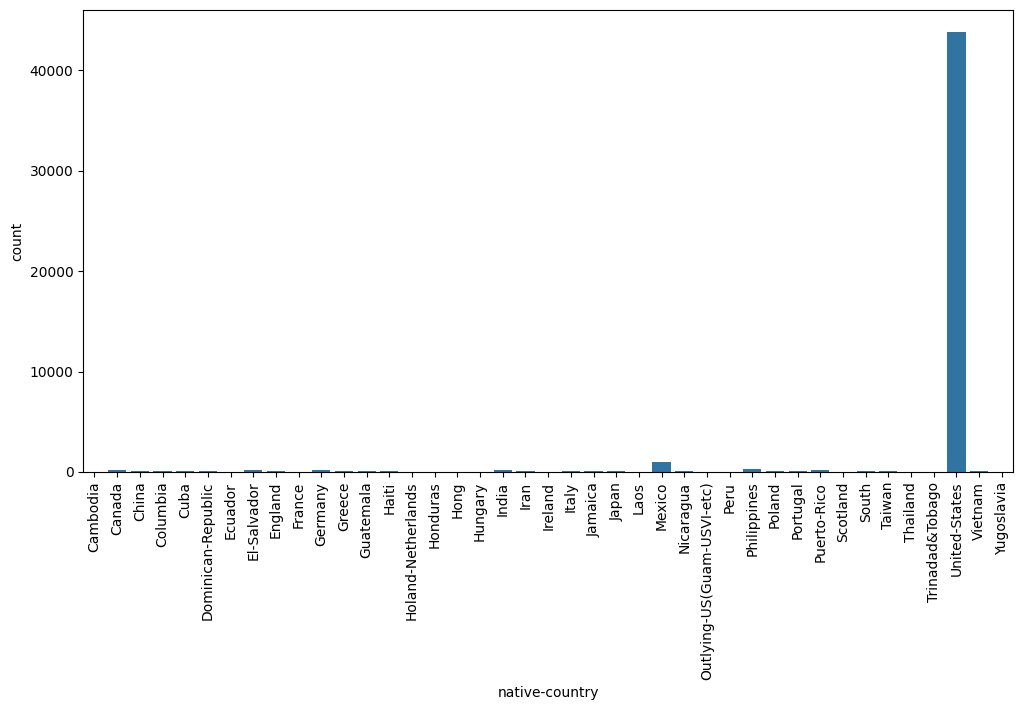

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='native-country')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['native-country'] = df['native-country'].apply(lambda x: 'Others' if x != 'United-States' else x)

In [ ]:
print(df['native-country'].value_counts())

native-country
United-States    43832
Others            4153
Name: count, dtype: int64


# Standardizing Data

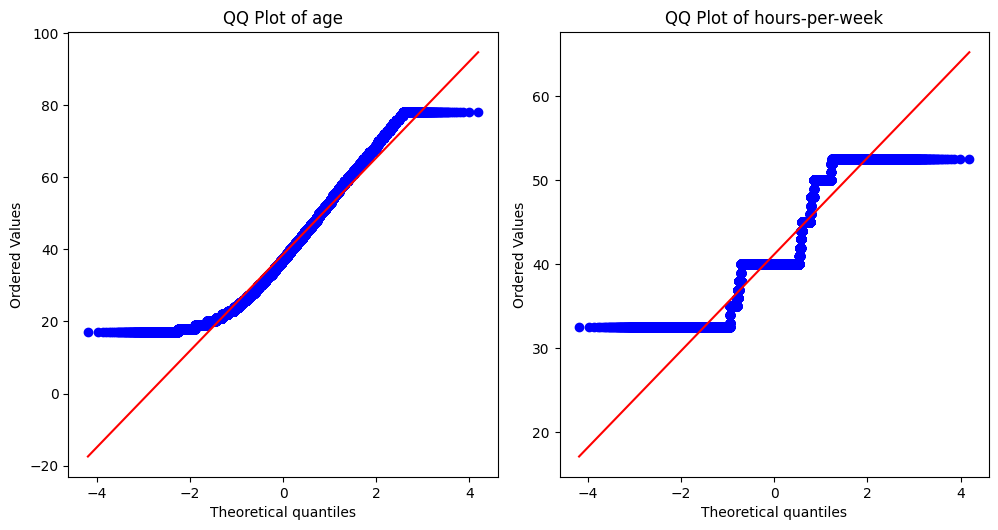

In [ ]:
# List of numerical columns
numerical_columns = ['age','hours-per-week']

# Set up the plot with subplots
plt.figure(figsize=(15, 10))

# Loop through each numerical column and plot the QQ plot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
# Calculate skewness for each numerical column
skewness = df[numerical_columns].skew()

# Display the skewness for each column
print("Skewness for each numerical column:")
print(skewness)


Skewness for each numerical column:
age               0.515820
hours-per-week    0.439533
dtype: float64


In [ ]:
# Apply logarithmic transformation to the right-skewed columns
right_skewed_columns = ['age', 'hours-per-week']

# Add 1 to avoid log(0) if there are zeros in the columns
df[right_skewed_columns] = df[right_skewed_columns].apply(lambda x: np.log(x + 1))

# Check the transformed data
print(df[right_skewed_columns].head())


        age  hours-per-week
0  3.258097        3.713572
1  3.663562        3.931826
2  3.367296        3.713572
3  3.806662        3.713572
4  2.944439        3.511545


In [ ]:
skewness = df[numerical_columns].skew()

# Display the skewness for each column
print("Skewness for each numerical column:")
print(skewness)


Skewness for each numerical column:
age              -0.125323
hours-per-week    0.177556
dtype: float64


# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Specify the numerical columns for scaling
numerical_columns = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling (Normalization)
df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Check the scaled data
print(df[numerical_columns].head())

        age  hours-per-week  capital-gain  capital-loss
0  0.248618        0.431555           0.0           0.0
1  0.522752        0.897773           0.0           0.0
2  0.322447        0.431555           0.0           0.0
3  0.619502        0.431555           0.0           0.0
4  0.036555        0.000000           0.0           0.0


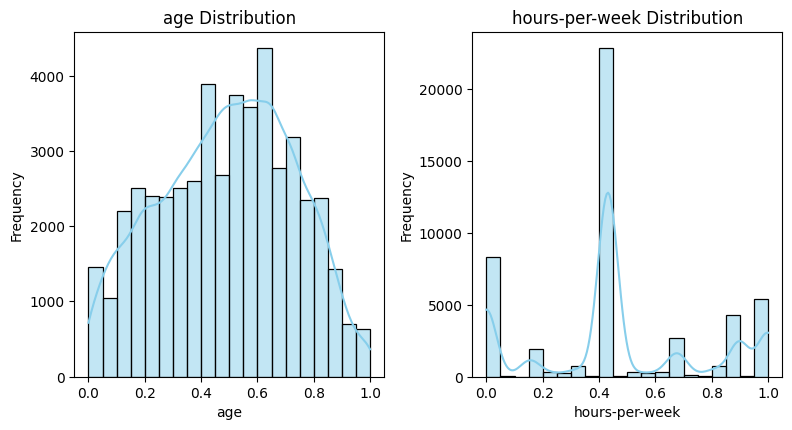

In [ ]:
# Columns to check
columns_to_check = ['age','hours-per-week']

# Plot histograms for the columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Discretization

In [ ]:
# Define bins and labels for age
bins_age = [0, 18, 30, 40, 50, 60, 100]  # Age ranges
labels_age = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']

# Discretize age
df['age'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, right=False)

# Define bins and labels for hours-per-week
bins_hours = [0, 20, 40, 60, 80, 100]
labels_hours = ['0-20', '20-40', '40-60', '60-80', '80+']

# Discretize hours-per-week
df['hours-per-week'] = pd.cut(df['hours-per-week'], bins=bins_hours, labels=labels_hours, right=False)

# Display the updated DataFrame
print(df.head())


   age  workclass  education-num      marital-status         occupation  \
0  <18    Private            7.0       Never-married  Machine-op-inspct   
1  <18    Private            9.0  Married-civ-spouse    Farming-fishing   
2  <18  Local-gov           12.0  Married-civ-spouse    Protective-serv   
3  <18    Private           10.0  Married-civ-spouse  Machine-op-inspct   
4  <18        NaN           10.0       Never-married                NaN   

  relationship   race     sex  capital-gain  capital-loss hours-per-week  \
0    Own-child  Black    Male           0.0           0.0           0-20   
1      Husband  White    Male           0.0           0.0           0-20   
2      Husband  White    Male           0.0           0.0           0-20   
3      Husband  Black    Male           0.0           0.0           0-20   
4    Own-child  White  Female           0.0           0.0           0-20   

  native-country  class  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-Stat

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','age','hours-per-week']

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

# Check the first few rows after encoding
print(df.head())


   age  workclass  education-num  marital-status  occupation  relationship  \
0    0          3            7.0               4           6             3   
1    0          3            9.0               2           4             0   
2    0          1           12.0               2          10             0   
3    0          3           10.0               2           6             0   
4    0          8           10.0               4          14             3   

   race  sex  capital-gain  capital-loss  hours-per-week  native-country  \
0     2    1           0.0           0.0               0               1   
1     4    1           0.0           0.0               0               1   
2     4    1           0.0           0.0               0               1   
3     2    1           0.0           0.0               0               1   
4     4    0           0.0           0.0               0               1   

   class  
0  <=50K  
1  <=50K  
2   >50K  
3   >50K  
4  <=50K  


# Handling Class Imbalance

In [ ]:
# Check the distribution of the target column
class_distribution = df['class'].value_counts()

# Calculate the percentage of each class
class_percentage = df['class'].value_counts(normalize=True) * 100

# Display results
print("Class Distribution:")
print(class_distribution)

print("\nClass Percentage:")
print(class_percentage)


Class Distribution:
class
<=50K    37155
>50K     11687
Name: count, dtype: int64

Class Percentage:
class
<=50K    76.071823
>50K     23.928177
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target) from df
X = df.drop(columns=['class'])
y = df['class']  # The target column

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the resulting splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(39073, 12) (9769, 12) (39073,) (9769,)


In [ ]:
# Check the counts of each class in the training and test sets
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
class
<=50K    29724
>50K      9349
Name: count, dtype: int64

Test set class distribution:
class
<=50K    7431
>50K     2338
Name: count, dtype: int64


In [ ]:
# Get the class percentages
class_percentage = y_train.value_counts(normalize=True) * 100
print(class_percentage)

class
<=50K    76.072992
>50K     23.927008
Name: proportion, dtype: float64


In [ ]:
# Check the data types of the columns
print(df.dtypes)


age                  int64
workclass            int64
education-num      float64
marital-status       int64
occupation           int64
relationship         int64
race                 int64
sex                  int64
capital-gain       float64
capital-loss       float64
hours-per-week       int64
native-country       int64
class             category
dtype: object


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
class_percentage_after = y_train_res.value_counts(normalize=True) * 100
print(class_percentage_after)


class
<=50K    50.0
>50K     50.0
Name: proportion, dtype: float64


Preproccessing stage is done

Making a copy of the cleaned dataset

In [ ]:
X_train_copy_1 = X_train_res.copy()
X_test_copy_1 = X_test.copy()
y_train_copy_1 = y_train_res.copy()
y_test_copy_1 = y_test.copy()

In [ ]:
print(y_train_copy_1.unique())
print(y_test_copy_1.unique())

['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']
['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']


In [ ]:
target_mapping = {
    '<=50K': 0,
    '>50K': 1
}

In [ ]:
y_train_copy_1 = y_train_copy_1.map(target_mapping)
y_test_copy_1 = y_test_copy_1.map(target_mapping)

In [ ]:
print(y_train_copy_1.head())
print(y_test_copy_1.head())

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: category
Categories (2, int64): [0, 1]
40342    0
47680    0
524      0
8508     0
31692    1
Name: class, dtype: category
Categories (2, int64): [0, 1]


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a basic logistic regression model (without regularization)
log_reg = LogisticRegression(solver='liblinear', random_state=0)
log_reg.fit(X_train_copy_1, y_train_copy_1)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
# Predict class labels
y_pred = log_reg.predict(X_test_copy_1)

# Predict probabilities
y_pred_proba_0 = log_reg.predict_proba(X_test_copy_1)[:,0]
y_pred_proba_1= log_reg.predict_proba(X_test_copy_1)[:,1]

In [ ]:
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
print(y_pred_proba_0)

[0.88433183 0.71062799 0.34818242 ... 0.13733125 0.95065343 0.39401404]


In [ ]:
print(y_pred_proba_1)

[0.11566817 0.28937201 0.65181758 ... 0.86266875 0.04934657 0.60598596]


In [ ]:
from sklearn.metrics import classification_report

# Classification report
print("Classification Report:")
print(classification_report(y_test_copy_1, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      7431
           1       0.43      0.77      0.55      2338

    accuracy                           0.70      9769
   macro avg       0.66      0.72      0.66      9769
weighted avg       0.79      0.70      0.72      9769



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_copy_1, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


Compare the train-set and test-set accuracy.

Now, I will compare the train-set and test-set accuracy to check for overfitting

In [ ]:
y_pred_train = log_reg.predict(X_train_copy_1)

y_pred_train

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train_copy_1 , y_pred_train)))

Training-set accuracy score: 0.73


Check for overfitting and underfitting

In [ ]:
print('Training set score: {:.4f}'.format(log_reg.score(X_train_copy_1, y_train_copy_1)))

print('Test set score: {:.4f}'.format(log_reg.score(X_test_copy_1, y_test_copy_1)))

Training set score: 0.7254
Test set score: 0.6985


No overfitting: The test score isn't significantly worse than the training score.
No significant underfitting: The model captures the data reasonably well, though the overall accuracy suggests there may be room for improvement.

By increasing the value of C, the regularization strength is reduced, allowing the model to capture more complex patterns in the data and potentially improve accuracy, addressing the issue of underfitting.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model with weaker regularization (C=100.0)
logreg100 = LogisticRegression(solver='liblinear', C=100.0, random_state=0)

# Fit the model to the training data
logreg100.fit(X_train_copy_1, y_train_copy_1)

# Display the model's coefficients
print("\nModel Coefficients (weights for each feature):")
print(logreg100.coef_)

# Display the model's intercept
print("\nModel Intercept (bias term):")
print(logreg100.intercept_)



Model Coefficients (weights for each feature):
[[ 0.         -0.1011509   0.36712673 -0.39127361 -0.00646946 -0.19693637
   0.14910041  0.78607967  0.          0.          0.         -0.15382272]]

Model Intercept (bias term):
[-3.37089022]


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train_copy_1, y_train_copy_1)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test_copy_1, y_test_copy_1)))

Training set score: 0.7254
Test set score: 0.6986


We can see that, C=100 results in higher test set accuracy

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [ ]:
# fit the Logsitic Regression model with C=0.01

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train_copy_1, y_train_copy_1)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train_copy_1, y_train_copy_1)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test_copy_1, y_test_copy_1)))

Training set score: 0.7249
Test set score: 0.6857


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relatiev to the default parameters.

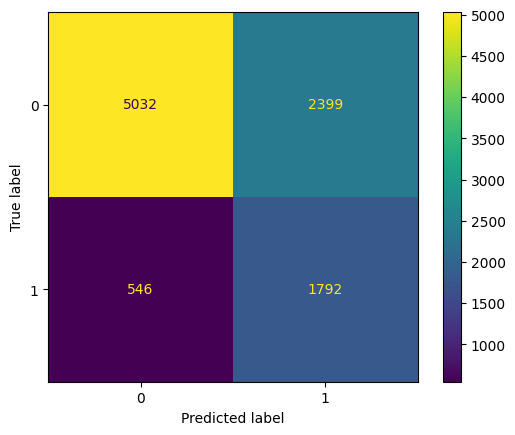

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_copy_1, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_).plot()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_copy_1, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      7431
           1       0.43      0.77      0.55      2338

    accuracy                           0.70      9769
   macro avg       0.66      0.72      0.66      9769
weighted avg       0.79      0.70      0.72      9769



In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = log_reg.predict_proba(X_test_copy_1)[0:10]

y_pred_prob

array([[0.88433183, 0.11566817],
       [0.71062799, 0.28937201],
       [0.34818242, 0.65181758],
       [0.48399139, 0.51600861],
       [0.21175601, 0.78824399],
       [0.49860869, 0.50139131],
       [0.18675711, 0.81324289],
       [0.49048607, 0.50951393],
       [0.50185819, 0.49814181],
       [0.83027262, 0.16972738]])

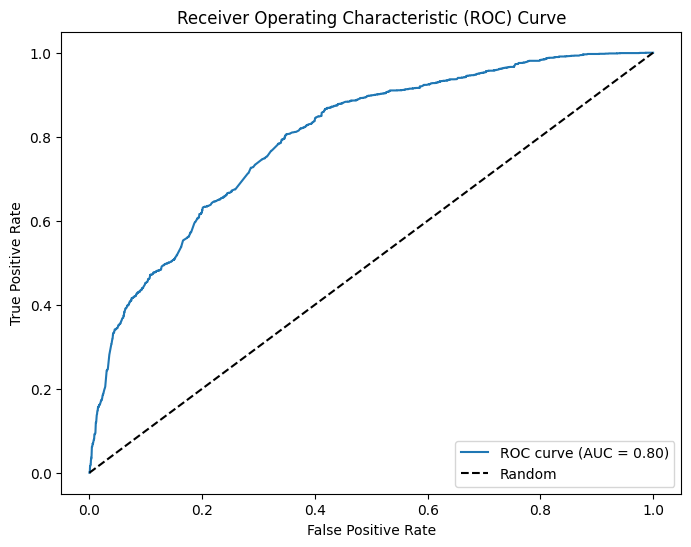

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = log_reg.predict_proba(X_test_copy_1)[:, 1]  # Probability of class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_copy_1, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test_copy_1, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

(0.0, 1.0)

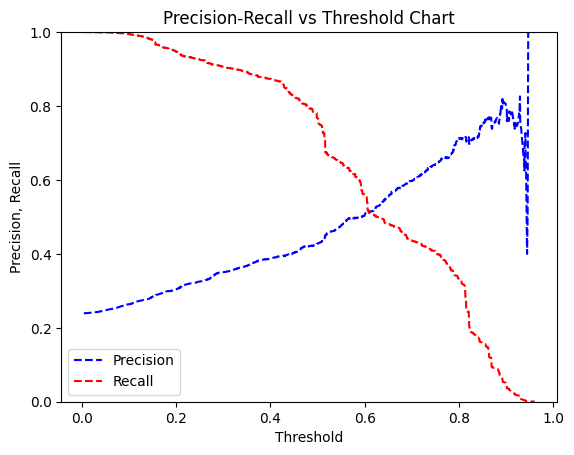

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test_copy_1, y_pred_proba)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0, 1])

from this curve we can see that the 0.6 is the best threshold we can get such that the model gives the balanced performance

In [ ]:
from sklearn.model_selection import cross_validate

# Specify scoring metrics
scoring_metrics = {'accuracy': 'accuracy', 'recall': 'recall'}

# Perform 5-fold cross-validation and calculate both metrics
scores = cross_validate(log_reg, X_train_copy_1, y_train_copy_1, cv=5, scoring=scoring_metrics)

# Print cross-validation accuracy and recall scores
print('Cross-validation accuracy scores: {}'.format(scores['test_accuracy']))
print('Cross-validation recall scores: {}'.format(scores['test_recall']))

# Compute and print averages for both metrics
print('Average cross-validation accuracy: {:.4f}'.format(scores['test_accuracy'].mean()))
print('Average cross-validation recall: {:.4f}'.format(scores['test_recall'].mean()))

Cross-validation accuracy scores: [0.72304458 0.71682086 0.73052986 0.73151653 0.72722685]
Cross-validation recall scores: [0.78149706 0.74852817 0.79882254 0.78532974 0.77291842]
Average cross-validation accuracy: 0.7258
Average cross-validation recall: 0.7774


we can see that the accuracy and recall both have been increased after using 5 fold cross validation

# Support Vector Machine (SVM)

In [ ]:
from sklearn import svm

In [ ]:
X_train_copy_2 = X_train_res.copy()
X_test_copy_2 = X_test.copy()
y_train_copy_2 = y_train_res.copy()
y_test_copy_2 = y_test.copy()

In [ ]:
X_train_copy_2.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,3,9.0,4,5,1,4,1,0.0,0.0,0,1
1,0,3,6.0,4,11,2,4,0,0.0,0.0,0,1
2,0,3,9.0,2,7,0,4,1,0.0,0.0,0,0
3,0,3,9.0,5,0,4,2,0,0.0,0.0,0,1
4,0,3,13.0,2,3,0,4,1,0.0,0.0,0,1


In [ ]:
X_test_copy_2 = pd.DataFrame(X_test_copy_2)

In [ ]:
# Train the SVM model on all features in X_train_copy_2, with C = 10
svc = svm.SVC(kernel='linear', C=10)
svc.fit(X_train_copy_2, y_train_copy_2)

# Predict the labels for X_test_copy_2
y_pred = svc.predict(X_test_copy_2)

# Train the SVM model on all features in X_train_copy_2, with C = 10
svc = svm.SVC(kernel='linear', C=10)
svc.fit(X_train_copy_2, y_train_copy_2)

# Predict the labels for X_test_copy_2
y_pred = svc.predict(X_test_copy_2)

# Calculate accuracy
accuracy = accuracy_score(y_test_copy_2, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
report = classification_report(y_test_copy_2, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7040
Accuracy: 0.7040
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.91      0.68      0.78      7431
        >50K       0.43      0.78      0.56      2338

    accuracy                           0.70      9769
   macro avg       0.67      0.73      0.67      9769
weighted avg       0.80      0.70      0.72      9769



In [ ]:
# Train the SVM model on all features in X_train_copy_2, with C = 100
svc = svm.SVC(kernel='linear', C=100)
svc.fit(X_train_copy_2, y_train_copy_2)

# Predict the labels for X_test_copy_2
y_pred = svc.predict(X_test_copy_2)

# Calculate accuracy
accuracy = accuracy_score(y_test_copy_2, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
report = classification_report(y_test_copy_2, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7070
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.91      0.69      0.78      7431
        >50K       0.44      0.78      0.56      2338

    accuracy                           0.71      9769
   macro avg       0.67      0.73      0.67      9769
weighted avg       0.79      0.71      0.73      9769




Increasing the value of C in the SVM model leads to a slight improvement in overall accuracy and maintains a balance between precision and recall for both classes, indicating that the model benefits from stronger regularization control.

**Goal is to find less misclassified but generalized model**

Using RBF Kernal

In [ ]:
# Train the SVM model with RBF kernel, C = 200, and gamma = 0.5
svc_rbf = svm.SVC(kernel='rbf', C=200, gamma=0.5)
svc_rbf.fit(X_train_copy_2, y_train_copy_2)

# Predict the labels for X_test_copy_2
y_pred_rbf = svc_rbf.predict(X_test_copy_2)

# Calculate accuracy
accuracy_rbf = accuracy_score(y_test_copy_2, y_pred_rbf)
print(f"Accuracy (RBF kernel, C=200, gamma=0.5): {accuracy_rbf:.4f}")

# Generate classification report for RBF kernel
report_rbf = classification_report(y_test_copy_2, y_pred_rbf)
print("Classification Report (RBF kernel):\n",report_rbf)

Accuracy (RBF kernel, C=200, gamma=0.5): 0.7598
Classification Report (RBF kernel):
               precision    recall  f1-score   support

       <=50K       0.91      0.75      0.83      7431
        >50K       0.50      0.78      0.61      2338

    accuracy                           0.76      9769
   macro avg       0.71      0.76      0.72      9769
weighted avg       0.81      0.76      0.77      9769



Next, I am going to perform hyperparameter tuning for the SVM model using the Radial Basis Function (RBF) kernel to find the optimal values for the parameters
𝐶
C (regularization strength) and
𝛾
γ (kernel coefficient).

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Ensure feature scaling for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_copy_2)
X_test_scaled = scaler.transform(X_test_copy_2)

# Define the parameter grid for Grid Search
param_grid = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1]}

# Initialize the SVM model with RBF kernel
svc = SVC(kernel='rbf')

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1  # Utilize all available cores
)

# Fit the Grid Search on the scaled training data
grid_search.fit(X_train_scaled, y_train_copy_2)

# Print the best parameters found by Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Get the best estimator (SVM model with optimal C and gamma)
best_svc = grid_search.best_estimator_

# Predict with the best model on the scaled test data
y_pred_best = best_svc.predict(X_test_scaled)

# Calculate accuracy
accuracy_best = accuracy_score(y_test_copy_2, y_pred_best)
print(f"Accuracy with best C and gamma: {accuracy_best:.4f}")

# Generate classification report
report_best = classification_report(y_test_copy_2, y_pred_best)
print("Classification Report with best C and gamma:\n", report_best)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters found:  {'C': 100, 'gamma': 1}
Accuracy with best C and gamma: 0.7526
Classification Report with best C and gamma:
               precision    recall  f1-score   support

       <=50K       0.92      0.74      0.82      7431
        >50K       0.49      0.78      0.60      2338

    accuracy                           0.75      9769
   macro avg       0.70      0.76      0.71      9769
weighted avg       0.81      0.75      0.77      9769



# Decision Tree Classifier

In [ ]:
X_train_copy_3 = X_train_res.copy()
X_test_copy_3 = X_test.copy()
y_train_copy_3 = y_train_res.copy()
y_test_copy_3 = y_test.copy()

In [ ]:
target_mapping = {
    '<=50K': 0,
    '>50K': 1
}
y_train_copy_3 = y_train_copy_3.map(target_mapping)
y_test_copy_3 = y_test_copy_3.map(target_mapping)

In [ ]:
y_test_copy_3.head()

,class
40342,0
47680,0
524,0
8508,0
31692,1


I will perform hyperparameter tuning for a Decision Tree Classifier using GridSearchCV, defining a grid of parameters (max_depth, min_samples_split, min_samples_leaf, and criterion), evaluating their combinations with 5-fold cross-validation, and identifying the combination that maximizes classification accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_copy_3, y_train_copy_3)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Here i will perform hyperparameter tuning for a Decision Tree Classifier by using 5-fold cross-validation to evaluate different values of max_depth (ranging from 1 to 10), calculating the mean accuracy for each value, and identifying the depth that achieves the highest classification accuracy.

In [ ]:
from sklearn.model_selection import cross_val_score

#Initialize the decision tree model
dt_model=DecisionTreeClassifier(random_state=42)

#Use 5 fold cross validation to find the best max_depth
max_depth_range=range(1,11)
cross_val_scores=[]
for depth in max_depth_range:
    dt_model=DecisionTreeClassifier(max_depth=depth,random_state=42)
    scores=cross_val_score(dt_model,X_train_copy_3,y_train_copy_3,cv=5, scoring='recall')
    cross_val_scores.append(scores.mean())

#Determine the optimal max_depth
optimal_max_depth=max_depth_range[cross_val_scores.index(max(cross_val_scores))]
print("Optimal max_depth:", optimal_max_depth)

Optimal max_depth: 4


In [ ]:
from __future__ import print_function
#Train the model with optimal max_depth
print_tree=DecisionTreeClassifier(max_depth=optimal_max_depth,random_state=42)
print_tree.fit(X_train_copy_3,y_train_copy_3)

#Apply post-pruning using cost-complexity pruning
path=print_tree.cost_complexity_pruning_path(X_train_copy_3,y_train_copy_3)
ccp_alphas=path.ccp_alphas

#Find the best alpha using cross validation
best_alpha = ccp_alphas[np.argmax(cross_val_score(DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[i]), X_train_copy_3,y_train_copy_3, cv=5).mean() for i in range(len(ccp_alphas)))]
final_model=DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha)
final_model.fit(X_train_copy_3,y_train_copy_3)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = final_model.predict(X_test_copy_3)

# Calculate accuracy
accuracy = accuracy_score(y_test_copy_3, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test_copy_3, y_pred))

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7431
           1       0.51      0.77      0.61      2338

    accuracy                           0.76      9769
   macro avg       0.71      0.77      0.72      9769
weighted avg       0.82      0.76      0.78      9769



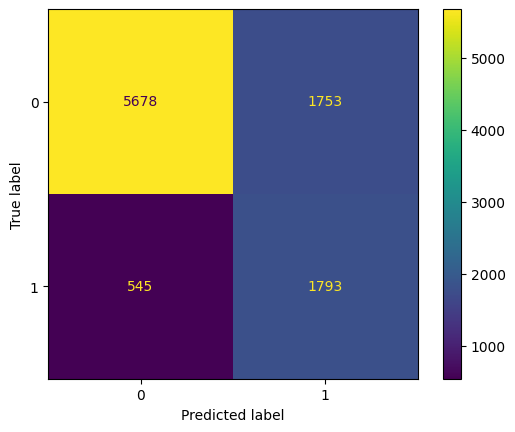

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_copy_3, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_).plot()

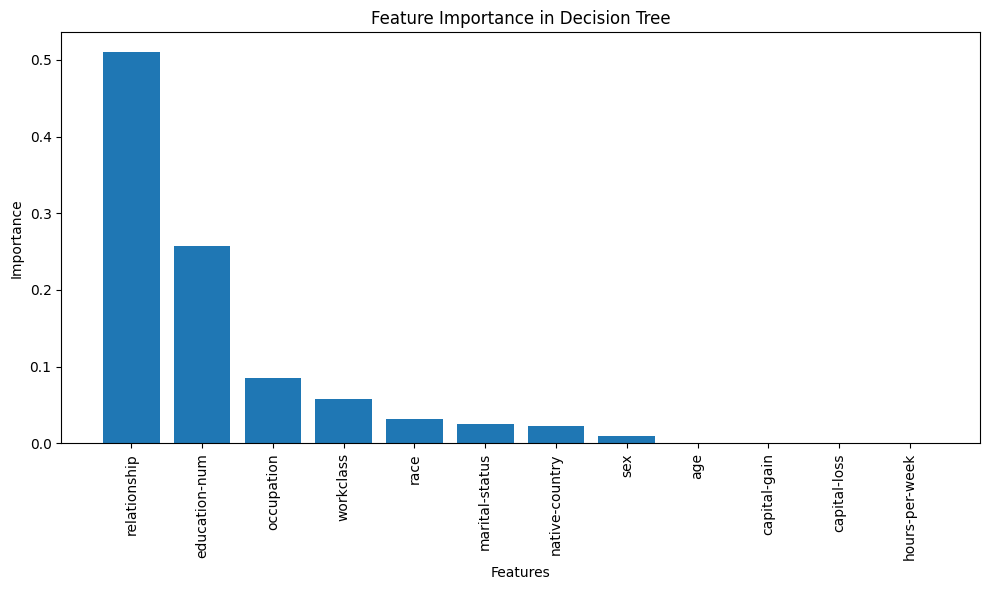

In [ ]:
# Get feature importances
importances = final_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': X_train_copy_3.columns, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Decision Tree")
plt.tight_layout()
plt.show()

# Random Forrest Classifier

In [ ]:
X_train_copy_4 = X_train_res.copy()
X_test_copy_4 = X_test.copy()
y_train_copy_4 = y_train_res.copy()
y_test_copy_4 = y_test.copy()

In [ ]:
target_mapping = {
    '<=50K': 0,
    '>50K': 1
}
y_train_copy_4 = y_train_copy_4.map(target_mapping)
y_test_copy_4 = y_test_copy_4.map(target_mapping)

To enhance predictive performance, I will employ an ensemble approach by combining the strengths of a Random Forest and an XGBoost classifier within a Voting Classifier framework, aiming to leverage their complementary strengths for improved predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Initialize individual classifiers
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', random_forest), ('xgb', xgb_classifier)],
    voting='soft'
)

# Fit the Voting Classifier to your training data
voting_clf.fit(X_train_copy_4, y_train_copy_4)

# Make predictions on the test data
y_pred_voting = voting_clf.predict(X_test_copy_4)

# Evaluate the performance (e.g., accuracy, classification report)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test_copy_4, y_pred_voting)
print(f"Accuracy of Voting Classifier: {accuracy}")
print(classification_report(y_test_copy_4, y_pred_voting))

Accuracy of Voting Classifier: 0.770907974204115
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      7431
           1       0.51      0.79      0.62      2338

    accuracy                           0.77      9769
   macro avg       0.72      0.78      0.73      9769
weighted avg       0.82      0.77      0.78      9769



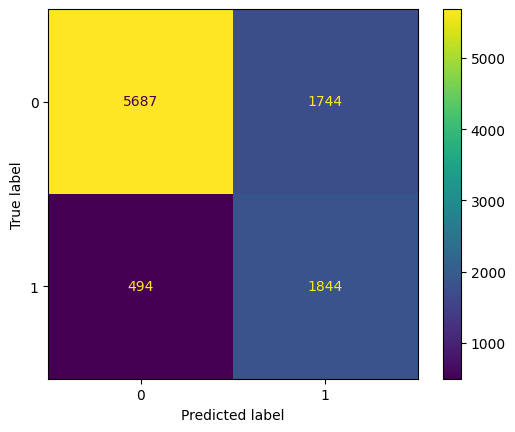

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_copy_4, y_pred_voting)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_).plot()

To further investigate the ensemble's performance, I will experiment with 'hard' voting in the Voting Classifier, where the final prediction is determined by the majority class label predicted by the base classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Initialize individual classifiers
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', random_forest), ('xgb', xgb_classifier)],
    voting='hard'
)

# Fit the Voting Classifier to your training data
voting_clf.fit(X_train_copy_4, y_train_copy_4)

# Make predictions on the test data
y_pred_voting = voting_clf.predict(X_test_copy_4)

# Evaluate the performance (e.g., accuracy, classification report)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test_copy_4, y_pred_voting)
print(f"Accuracy of Voting Classifier (hard voting): {accuracy}")
print(classification_report(y_test_copy_4, y_pred_voting))

Accuracy of Voting Classifier (hard voting): 0.7768451223257242
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      7431
           1       0.52      0.76      0.62      2338

    accuracy                           0.78      9769
   macro avg       0.72      0.77      0.73      9769
weighted avg       0.82      0.78      0.79      9769



It can be seen that both accuracy and recall has been increased when hard voting is used.

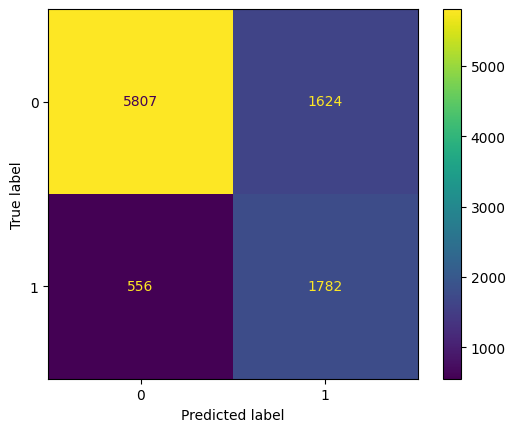

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_copy_4, y_pred_voting)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_).plot()

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__min_child_weight': [1, 3, 5]
}

# Initialize individual classifiers
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Create Voting Classifier with hard voting
voting_clf_hard = VotingClassifier(
    estimators=[('rf', random_forest), ('xgb', xgb_classifier)],
    voting='hard'
)

# Perform Grid Search
grid_search = GridSearchCV(voting_clf_hard, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_copy_4, y_train_copy_4)

# Get the best estimator and evaluate
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_copy_4)
accuracy_best = accuracy_score(y_test_copy_4, y_pred_best)
print(f"Accuracy of Best Model: {accuracy_best}")
print(classification_report(y_test_copy_4, y_pred_best))
print("Best Hyperparameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Accuracy of Best Model: 0.775104923738356
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      7431
           1       0.52      0.77      0.62      2338

    accuracy                           0.78      9769
   macro avg       0.72      0.77      0.73      9769
weighted avg       0.82      0.78      0.79      9769

Best Hyperparameters: {'rf__max_depth': 20, 'rf__min_samples_split': 5, 'rf__n_estimators': 200, 'xgb__max_depth': 7, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 200}


# Bernoulli Naïve Bayes Classifier

Bernoulli Naïve Bayes is specifically designed for binary features. It calculates probabilities using the Bernoulli distribution, which assumes each feature can either be present (1) or absent (0). This is ideal for datasets like text classification with binary term presence or absence indicators.

In [ ]:
X_train_copy_5 = X_train_res.copy()
X_test_copy_5 = X_test.copy()
y_train_copy_5 = y_train_res.copy()
y_test_copy_5 = y_test.copy()

In [ ]:
import pandas as pd

# Check for missing values in the training dataset
print("Missing values in X_train_copy_5:")
print(X_train_copy_5.isnull().sum())

print("\nMissing values in X_test_copy_5:")
print(X_test_copy_5.isnull().sum())

# For target variables
print("\nMissing values in y_train_copy_5:")
print(y_train_copy_5.isnull().sum())

print("\nMissing values in y_test_copy_5:")
print(y_test_copy_5.isnull().sum())


Missing values in X_train_copy_5:
age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

Missing values in X_test_copy_5:
age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

Missing values in y_train_copy_5:
0

Missing values in y_test_copy_5:
0


In [ ]:
# Define the target mapping
target_mapping = {
    '<=50K': 0,
    '>50K': 1
}

# Apply the mapping to both y_train_copy_5 and y_test_copy_5
y_train_copy_5 = y_train_copy_5.map(target_mapping)
y_test_copy_5 = y_test_copy_5.map(target_mapping)

# Verify the conversion
print(y_train_copy_5.unique())
print(y_test_copy_5.unique())

# Optional: Convert to integer type
y_train_copy_5 = y_train_copy_5.astype(int)
y_test_copy_5 = y_test_copy_5.astype(int)

[0, 1]
Categories (2, int64): [0, 1]
[0, 1]
Categories (2, int64): [0, 1]


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize model
bnb = BernoulliNB()

# Train the model
bnb.fit(X_train_copy_5, y_train_copy_5)

# Make predictions
y_pred = bnb.predict(X_test_copy_5)


# Evaluate
print(confusion_matrix(y_test_copy_5, y_pred))
print(classification_report(y_test_copy_5, y_pred))


[[5191 2240]
 [ 570 1768]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      7431
           1       0.44      0.76      0.56      2338

    accuracy                           0.71      9769
   macro avg       0.67      0.73      0.67      9769
weighted avg       0.79      0.71      0.73      9769



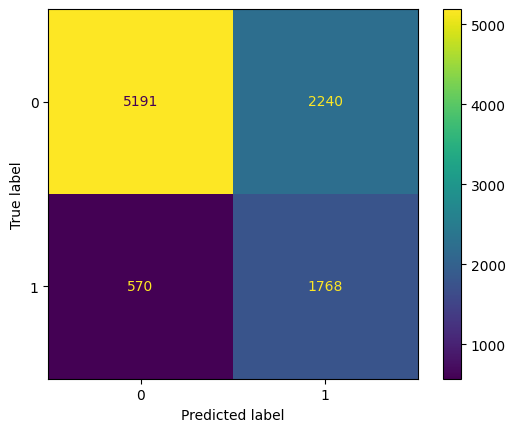

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_copy_5, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_).plot()

# k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train_copy_5, y_train_copy_5)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test_copy_5)

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7431
           1       0.57      0.58      0.58      2338

    accuracy                           0.80      9769
   macro avg       0.72      0.72      0.72      9769
weighted avg       0.80      0.80      0.80      9769



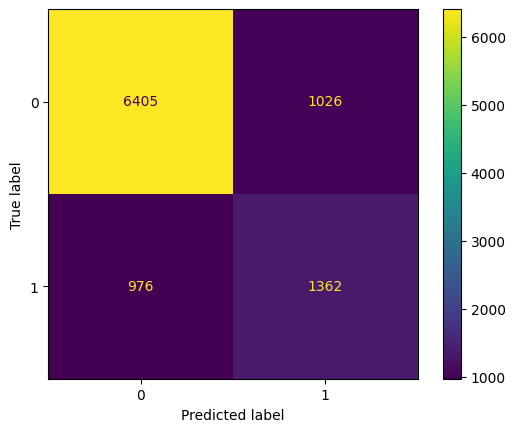

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test_copy_5, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test_copy_5, y_pred_knn))

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_copy_5, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_).plot()

Best n_neighbors: 15
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7431
           1       0.60      0.64      0.62      2338

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.75      9769
weighted avg       0.82      0.81      0.81      9769



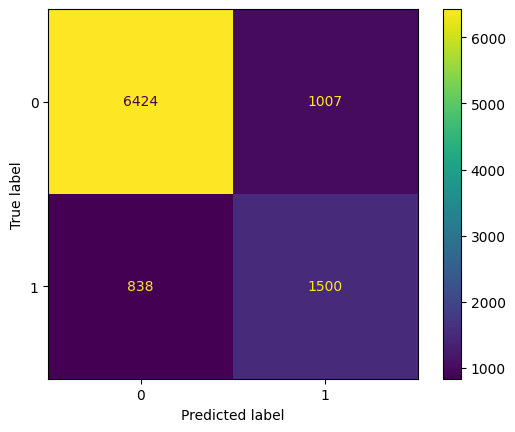

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# Initialize KNN and GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to your training data
grid_search.fit(X_train_copy_5, y_train_copy_5)

# Get the best value for n_neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']
print("Best n_neighbors:", best_n_neighbors)

# Create and train the KNN model with the best n_neighbors
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn.fit(X_train_copy_5, y_train_copy_5)

# Make predictions on the test set
y_pred_knn = best_knn.predict(X_test_copy_5)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_copy_5, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test_copy_5, y_pred_knn))

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_copy_5, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_knn.classes_).plot()

# Conclusion

Conclusion for Logistic Regression:


Best Configuration: C=1
Reason: It has the best balance of accuracy (70%) and recall (macro average: 72%).
Higher C overfits, while lower C underfits.


Conclusion for Support Vector Machine:

RBF Kernel consistently outperforms the Linear Kernel in terms of both accuracy and recall:
Linear kernel models (with C=10 and C=100) achieved an accuracy of ~70.4% to 70.7% and a macro-average recall of ~73%.
RBF kernel models achieved higher accuracy (up to 75.98%) and macro-average recall (76%), demonstrating superior performance in capturing non-linear patterns in the data.
 Impact of Hyperparameter Tuning
Manually Set Parameters (C=200,γ=0.5):
This configuration produced the highest accuracy (75.98%) and strong recall for both classes (<=50K: 75%, >50K: 78%).
Precision for class >50K was 50%, slightly better than Grid Search results.
Grid Search Optimized Parameters (C=100,γ=1):
While Grid Search automated the selection process, the resulting model achieved slightly lower accuracy (75.26%) but matched the macro-average recall (76%).
Precision for class >50K was slightly lower at 49%.


Conclusion for Decision tree:

The hyperparameter-tuned Decision Tree Classifier achieved an accuracy of 76% and a recall of 76% for the majority class (<=50K) and 77% for the minority class (>50K), demonstrating strong performance in correctly identifying both classes.

Conclusion for Random Forrest Classifier

The ensemble approach using a **Voting Classifier** with **Random Forest** and **XGBoost** classifiers achieved an accuracy of **77.1%** with soft voting, and recall values of **77%** for the majority class (<=50K) and **79%** for the minority class (>50K). When experimenting with hard voting, the accuracy slightly improved to **77.7%**, with recall values of **78%** for <=50K and **76%** for >50K. This shows that combining these two models enhances predictive performance, with a marginal improvement in accuracy and recall for the majority class using hard voting.


Conclusion for The Bernoulli Naive Bayes classifier:

The Bernoulli Naive Bayes classifier achieved an accuracy of 71%, with recall values of 70% for the majority class (<=50K) and 76% for the minority class (>50K). The model demonstrated a precision of 90% for class <=50K and 44% for class >50K. While the recall for the minority class is strong, the precision for >50K indicates some misclassifications. The macro-average recall is 73%, and the weighted average recall is 71%, reflecting a solid performance overall but with room for improvement, particularly in the precision for the minority class.

Conclusion for k-Nearest Neighbors:

The K-Nearest Neighbors (KNN) classifier initially achieved an accuracy of 80%, with a recall of 86% for the majority class (<=50K) and 58% for the minority class (>50K). After performing hyperparameter tuning with GridSearchCV, the optimal value for n_neighbors was found to be 15. With this best configuration, the model's accuracy increased to 81%. The recall for class <=50K was 86%, while for class >50K, it improved to 64%. The macro-average recall is 75%, and the weighted average recall is 81%, reflecting a strong performance with improved recall for the minority class after hyperparameter optimization.

**Based on the results, the k-Nearest Neighbors (KNN) classifier stands out as the best-performing model for this classification problem. After hyperparameter tuning, KNN achieved the highest accuracy of 81%, surpassing all other models. It also demonstrated excellent recall for the majority class (<=50K) at 86%, while the recall for the minority class (>50K) improved to 64%, reflecting a significant enhancement in capturing the minority class compared to its initial configuration. With a macro-average recall of 75%, KNN shows a strong balance between the two classes, making it highly effective for identifying both. While the Random Forest and XGBoost ensemble and the RBF Kernel SVM delivered competitive results with accuracy values of 77.7% and 75.98% respectively, their recall for the minority class did not match KNN's performance. Therefore, KNN's superior accuracy and balanced recall make it the most suitable choice for this task.**